In [1]:
import os
from pathlib import Path
from module.pose import Pose
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation


### Dataset | Haomo

*Rearrage kitti format pose to tum format*

In [2]:
DATASET_DIR = Path("/data/datasets/dataset_haomo")
data_01_02 = np.genfromtxt(DATASET_DIR/'01_02.txt')
data_03 = np.genfromtxt(DATASET_DIR/'03.txt')


In [3]:
pose_01_02_tum = Pose.kitti2tum(data_01_02)
pose_03_tum = Pose.kitti2tum(data_03)
print(f"pose_01_02_tum: {pose_01_02_tum.shape}")

pose_01_02_T = Pose.tum2transformation(pose_01_02_tum)
pose_03_T = Pose.tum2transformation(pose_03_tum)
print(f"pose_01_02_T: {pose_01_02_T.shape}")

## For function check
# pose_01_02_tum2 = Pose.transformation2tum(pose_01_02_T)
# np.set_printoptions(precision=6)
## Two poses below must be the same
# print(pose_01_02_tum[10])
# print(pose_01_02_tum2[10])

TF = np.genfromtxt(DATASET_DIR/'transformation_bet_traj.txt')
# print(TF.shape)
# print(TF)

# pose_01_02_wrt_03_T = pose_01_02_T @ TF
# pose_01_02_wrt_03_tum = Pose.transformation2tum(pose_01_02_wrt_03_T)

# pose_03_wrt_01_02_T = pose_03_T @ TF
# pose_03_wrt_01_02_tum = Pose.transformation2tum(pose_03_wrt_01_02_T)

pose_01_02_wrt_03_T = np.zeros_like(pose_01_02_T)
for i in range(pose_01_02_T.shape[0]):
    pose_01_02_wrt_03_T[i] = TF @ pose_01_02_T[i]
pose_01_02_wrt_03_tum = Pose.transformation2tum(pose_01_02_wrt_03_T)

pose_03_wrt_01_02_T = np.zeros_like(pose_03_T)
for i in range(pose_03_T.shape[0]):
    pose_03_wrt_01_02_T[i] = TF @ pose_03_T[i]
pose_03_wrt_01_02_tum = Pose.transformation2tum(pose_03_wrt_01_02_T)


pose_01_02_tum: (17423, 7)
pose_01_02_T: (17423, 4, 4)


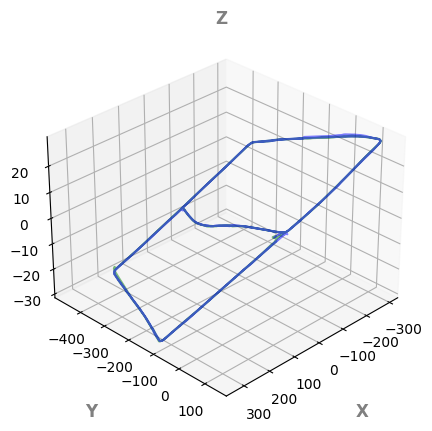

In [4]:
fig, ax = plt.subplots(ncols=1, figsize=(5, 5),
                        subplot_kw={"projection":"3d"})

fontlabel = {"fontsize":"large", "color":"gray", "fontweight":"bold"}
ax.set_xlabel("X", fontdict=fontlabel, labelpad=16)
ax.set_ylabel("Y", fontdict=fontlabel, labelpad=16)
ax.set_title("Z", fontdict=fontlabel)
ax.view_init(elev=30., azim=45)    # 각도 지정

# ax.plot(pose_03_wrt_01_02_tum[:,0],
#         pose_03_wrt_01_02_tum[:,1],
#         pose_03_wrt_01_02_tum[:,2],
#         c='k', alpha=0.5)

ax.plot(pose_03_tum[:,0],
        pose_03_tum[:,1],
        pose_03_tum[:,2],
        c='g', alpha=0.5)


# ax.plot(pose_01_02_tum[:,0],
#         pose_01_02_tum[:,1],
#         pose_01_02_tum[:,2],
#         c='r', alpha=0.5)
ax.plot(pose_01_02_wrt_03_tum[:,0],
        pose_01_02_wrt_03_tum[:,1],
        pose_01_02_wrt_03_tum[:,2],
        c='b', alpha=0.5)



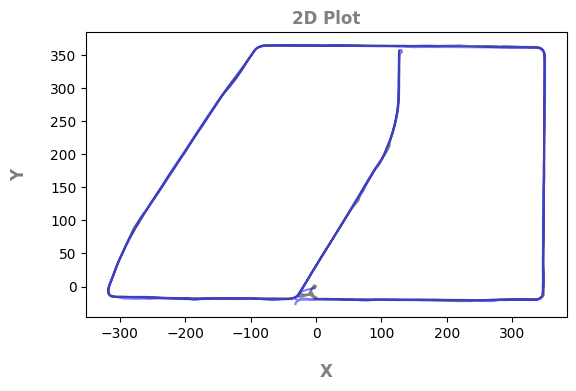

In [5]:
rotmat_z_up: np.ndarray = Pose.get_rotmat_for_z_up(pose_03_tum[:,0:3])
pose_03_tum[:,0:3] = pose_03_tum[:,0:3] @ rotmat_z_up.T
pose_01_02_wrt_03_tum[:,0:3] = pose_01_02_wrt_03_tum[:,0:3] @ rotmat_z_up.T

rot = Rotation.from_euler('z', 200, degrees=True).as_matrix()
pose_03_tum[:,0:3] = pose_03_tum[:,0:3] @ rot.T
pose_01_02_wrt_03_tum[:,0:3] = pose_01_02_wrt_03_tum[:,0:3] @ rot.T

fig, ax = plt.subplots(ncols=1, figsize=(6.2, 3.7))

fontlabel = {"fontsize":"large", "color":"gray", "fontweight":"bold"}
ax.set_xlabel("X", fontdict=fontlabel, labelpad=16)
ax.set_ylabel("Y", fontdict=fontlabel, labelpad=16)
ax.set_title("2D Plot", fontdict=fontlabel)

ax.plot(pose_03_tum[:,0],
        pose_03_tum[:,1],
        c='k', alpha=0.5)
ax.plot(pose_01_02_wrt_03_tum[:,0],
        pose_01_02_wrt_03_tum[:,1],
        c='b', alpha=0.5)


/tmp/ipykernel_822958/181571534.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


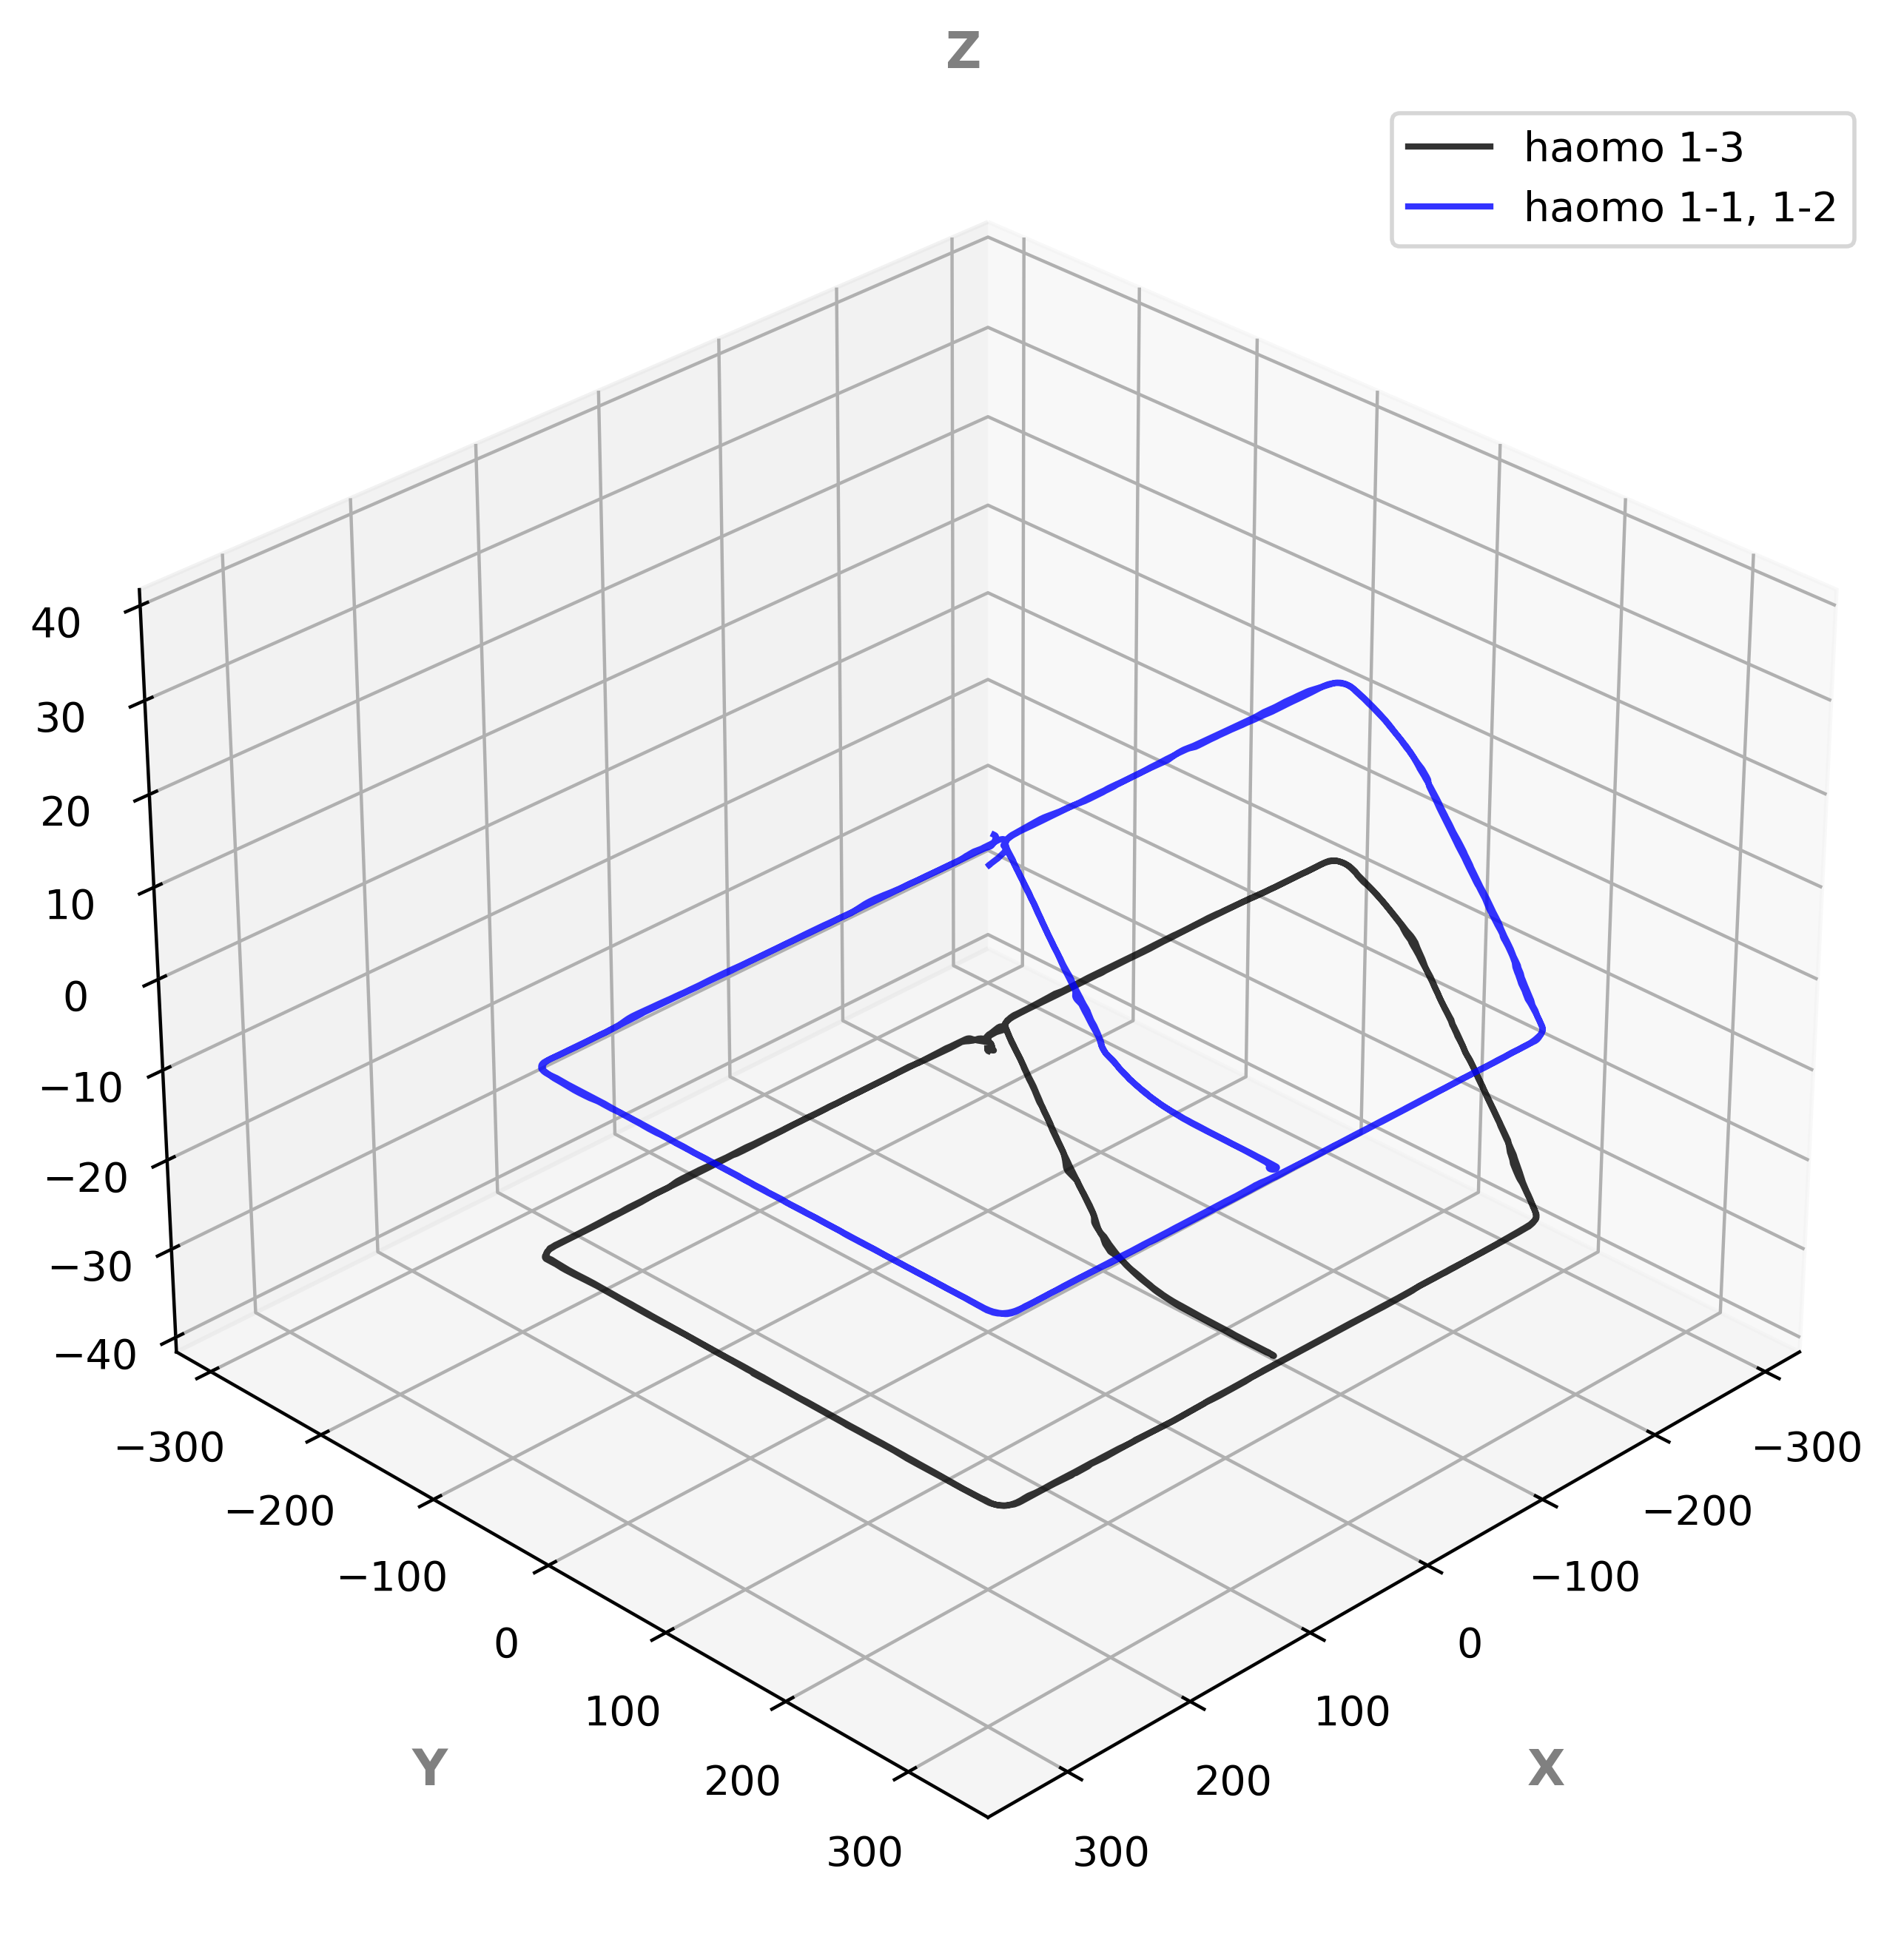

In [20]:
fig, ax = plt.subplots(ncols=1, figsize=(8, 8),
                        subplot_kw={"projection":"3d"}, dpi=400)

ax.set_zlim3d(-40.0, 40.0)
ax.set_xlim3d(pose_03_tum[:,0].min(), pose_03_tum[:,0].max())
ax.set_ylim3d(pose_03_tum[:,0].min(), pose_03_tum[:,0].max())
fontlabel = {"fontsize":"large", "color":"gray", "fontweight":"bold"}
ax.set_xlabel("X", fontdict=fontlabel, labelpad=16)
ax.set_ylabel("Y", fontdict=fontlabel, labelpad=16)
ax.set_title("Z", fontdict=fontlabel)
ax.view_init(elev=30., azim=45)    # 각도 지정

ax.plot(pose_03_tum[:,0],
        pose_03_tum[:,1],
        -10.0,
        c='k', alpha=0.8, label='haomo 1-3')

ax.plot(pose_01_02_wrt_03_tum[:,0],
        pose_01_02_wrt_03_tum[:,1],
        10.0,
        c='b', alpha=0.8, label='haomo 1-1, 1-2')
ax.legend(loc='best')
fig.show()


In [21]:
pose_01_02_fn = DATASET_DIR/'pose_01_02_tum.txt'
pose_03_fn = DATASET_DIR/'pose_03_tum.txt'
header = ' px py pz qx qy qz qw (as TUM format)'
np.savetxt(pose_01_02_fn, pose_01_02_wrt_03_tum, fmt='%.6f', delimiter=' ', header=header)
np.savetxt(pose_03_fn, pose_03_tum, fmt='%.6f', delimiter=' ', header=header)
